In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_data = pd.read_csv('railway.csv')

# 1-Data Wrangling
Now that we've loaded our data, it's time to check the data for errors and clean them, commonly known as 'Data Wrangling'.

## **0-General Properties:**

In [2]:
train_data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

## **1- Identifying NaNs:**

In [4]:
train_data.isnull().sum()

,0
Transaction ID,0
Date of Purchase,0
Time of Purchase,0
Purchase Type,0
Payment Method,0
Railcard,20918
Ticket Class,0
Ticket Type,0
Price,0
Departure Station,0




As you can see, we have **three** columns with NaN values, specifically the 'Railcard' , 'Reason For delay' and  'Actual Arrival Time' columns. Two of which have logical reasons behind their missing values.

First, the Railcard columnis left empty in the case a passanger is not a National Railcard Holder, therefore it makes sense to be have missing values.

Second, the Reason For Delay column is left empty in the case of no delays, which is logically reasonable.

Finally, the Actual Arrival Time column is left without an excuse for having empty spaces, this will be addressed further in the cleaning section.


---

## **2-Duplicate Rows:**


Now, we will check for duplicate rows of data.

In [5]:
train_data.duplicated().sum()

np.int64(0)

No duplicated rows of data is a sign of a complete, safe datset, but we must keep making sure of that before analysing.

---


## **3-Checking for Mixed Data Types:**


Our next step is checking if the data types match.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [7]:
train_data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


As can be seen, multiple rows are in the wrong category. Specifically: Date of Purchase is classified as an object, not date-time, same deal with date of journey.

---



## **4-Categorical Consistency:**

Now its time to make sure that the categorical data here is consistent, (ie male isnt written as m sometimes, things like that).

In [8]:
train_data['Railcard'].unique()

array(['Adult', nan, 'Disabled', 'Senior'], dtype=object)

In [9]:
train_data['Ticket Type'].unique()

array(['Advance', 'Off-Peak', 'Anytime'], dtype=object)

In [10]:
train_data['Payment Method'].unique()

array(['Contactless', 'Credit Card', 'Debit Card'], dtype=object)

In [11]:
train_data['Ticket Class'].unique()

array(['Standard', 'First Class'], dtype=object)

In [12]:
train_data['Refund Request'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
train_data['Journey Status'].unique()

array(['On Time', 'Delayed', 'Cancelled'], dtype=object)

Rest assured, we can confirm that none of our catgeorical data is nuanced in its noting method. This means our data doesn't require any reassignment of any sort when it comes to categorical data.



---
# 2-Data Cleaning
Now that we've identified our problems, it's time to get to clear them of our dataset!

---





## **1- NaN values**:


First off, we can clear our NaN values from the Actual Arrival Time column by logically deducing that if there was no data written, that the journey was cancelled.

This hypothesis is confirmed by the code below, where every row without an Actual Arrival Time value has been cancelled.

In [14]:
NaN_Actual = train_data[train_data['Actual Arrival Time'].isnull() == True]
NaN_Actual

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,No
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02,16:00:00,17:20:00,NaN,Cancelled,Technical Issue,No
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,Yes
111,d618c56f-3512-484d-9876,2024-01-02,03:33:32,Station,Credit Card,NaN,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-02,05:00:00,06:20:00,NaN,Cancelled,Staffing,Yes
148,eace2ada-5294-47e6-b4b8,2024-01-02,06:33:00,Station,Credit Card,NaN,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02,08:00:00,10:15:00,NaN,Cancelled,Staff Shortage,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31639,465e3643-fb67-4deb-8ec9,2024-04-30,17:13:32,Station,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30,18:45:00,20:35:00,NaN,Cancelled,Signal failure,No
31641,2e96cde6-50c1-4311-8089,2024-04-30,17:16:04,Station,Credit Card,Adult,Standard,Anytime,95,London Euston,Manchester Piccadilly,2024-04-30,18:45:00,20:35:00,NaN,Cancelled,Signal failure,Yes
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,18:45:00,19:15:00,NaN,Cancelled,Weather Conditions,No
31644,1eacd955-f539-4c79-adb6,2024-04-30,17:26:33,Online,Credit Card,NaN,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-04-30,18:45:00,20:05:00,NaN,Cancelled,Signal Failure,No


This makes the NaN mistake in this column more like an innacuracy, but we should still optimize our data by leaving no NaNs.

In [15]:
train_data['Actual Arrival Time'] = train_data["Actual Arrival Time"].fillna('Journey Cancelled')
train_data['Actual Arrival Time'].isnull().sum()

np.int64(0)

We will be optimizing our data again by leaving no NaNs in the other two columns with NaNs, filling empty cells with a logical and reasonable value.

In [16]:
train_data['Railcard'] = train_data['Railcard'].fillna("No Railcard")
train_data['Railcard'].isnull().sum()

np.int64(0)

In [17]:
train_data['Reason for Delay'] = train_data['Reason for Delay'].fillna("No Delay")
train_data['Reason for Delay'].isnull().sum()

np.int64(0)

Now that that's cleared, we can move on from NaN values confidently.

---


## **2-Mixed data types:**



As we saw in our wrangling section, there are multiple columns in the wrong data type, namingly  both the 'Date of Purchase' and 'Date of Journey' columns.

They're both stored in strings in the data, while we want them as date-time type to ensure data accuracy. Pandas has a specific command for this, thankfully.

In [18]:
train_data['Date of Purchase'] = pd.to_datetime(train_data['Date of Purchase'], errors='coerce')
train_data['Date of Journey'] = pd.to_datetime(train_data['Date of Journey'], errors='coerce')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  datetime64[ns]
 2   Time of Purchase     31653 non-null  object        
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  datetime64[ns]
 12  Departure Time       31653 non-null  object        
 13  Arrival Time         31653 non-

Just with those simple commands, our dataset is clear of any mixed data types.

With that, we also have no NaNs or mixed data types, leaving our data clean and ready for analytics.



---
# 3-Data Analysis

Now that our data is clean of all errors, its time to pick it apart and reach conclusions!

This section will be structured as different questions we need answered as seperate sections seperated by a line, like so.

---


## **1-Does cancelling a journey or delaying it cause more refunds?**


To answer this, we're going to create two dataframes, one with the rows including a delayed ride, and one with rows including a cancelled ride.

In [19]:
delay = train_data[train_data['Journey Status'] == 'Delayed']
cancelled = train_data[train_data['Journey Status'] == 'Cancelled']

Now that we've created those dataframes, we can compare the precentage of passangers refunding tickets on a cancelled ride versus the precentage on a delayed ride.

In [20]:
cancelled_refunds = cancelled[cancelled['Refund Request'] == 'Yes']
p1 = ( cancelled_refunds['Refund Request'].count()/cancelled['Refund Request'].count())*100
print('The percentage of people refunding tickets when a journey is cancelled is ',int(np.round(p1)),'%')

The percentage of people refunding tickets when a journey is cancelled is  30 %


In [21]:
delay_refunds = delay[delay['Refund Request'] == 'Yes']
p2 =( delay_refunds['Refund Request'].count()/delay['Refund Request'].count())*100
print('The percentage of people refunding tickets when a journey is delayed is',int(np.round(p2)),'%')

The percentage of people refunding tickets when a journey is delayed is 24 %


As can be seen in the code above, the amount of people refunding when a journey is cancelled is significantly higher than when a journey is delayed, which seems logically intuitive.

This proves that when a journey is delayed, it's less optimal to cancel it and give an alternative ticket (as happens with cancelled rides) than it is to just continue on the delayed schedule.

---



## **2-Which arrival destination is the most expensive?**

For this question, we'll have to take a look at the 'Arrival Destination' column next to the 'Price' column in a bar plot.

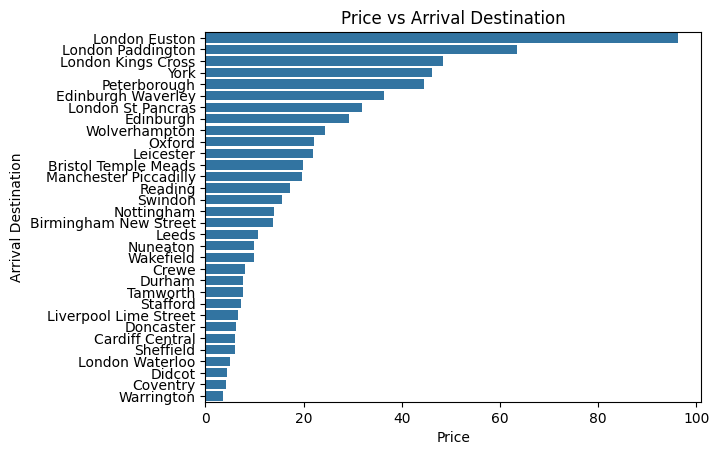

In [109]:
# Calculate average price for each arrival destination
avg_prices = train_data.groupby('Arrival Destination')['Price'].mean().sort_values(ascending = False)

# Get the order of arrival destinations based on average price
y_order = avg_prices.index


# Create the barplot, specifying the order of y-axis categories
sns.barplot(data=train_data, x="Price", y="Arrival Destination", order=y_order, errorbar = None);
plt.title("Price vs Arrival Destination");
plt.ylabel("Arrival Destination");
plt.xlabel("Price");
plt.show();

As you can see, it seems that London Euston has our highest price for a destination, with Warrington on the other end of the spectrum.

However, there is another factor to take into consideration when looking at this question: Frequency. You see, if we barely sent out trains to London Euston, then we'll barely get any money for it. Therefore, we'll have to see which destination is the most frequent.

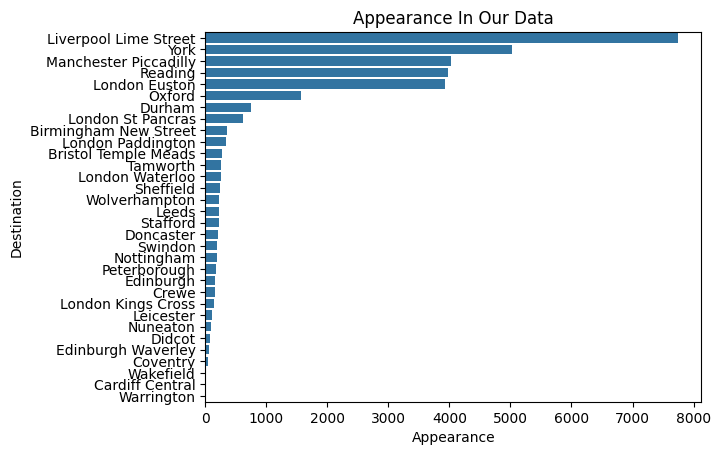

In [104]:
sns.barplot(x = train_data["Arrival Destination"].value_counts(), y = train_data["Arrival Destination"].unique());
plt.title("Appearance In Our Data");
plt.xlabel("Appearance");
plt.ylabel("Destination");
plt.show();

Interestingly, London Euston is still relatively high, while Warrington continues to fail. However, to get the one that's gotten us the highest profits, we must do some mathematics.

The mathematics I mean is by getting how much each destination appeared (how many tickets were bought to that place) and the average prices we got earlier by it to get an average revenue to see how much each location gets us on average.

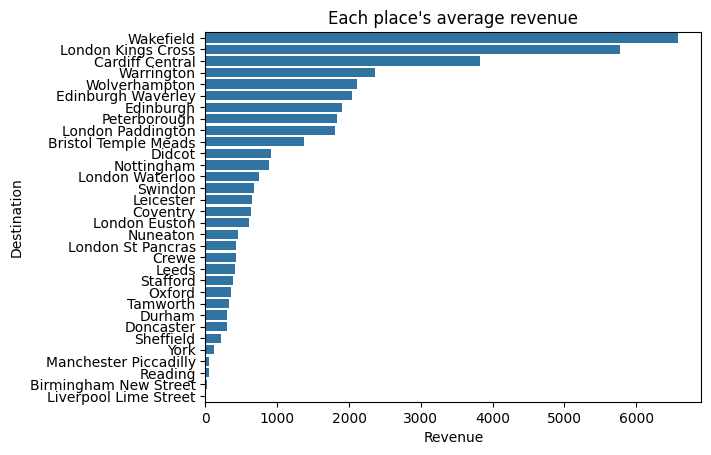

In [105]:
# Calculate the count of each arrival destination
destination_counts = train_data.groupby('Arrival Destination')["Arrival Destination"].value_counts()

# Here, I make the average revenue by dividing average prices by the destination counts
# You may notice the times ten to the power of four, and that was an aesthetic choice so that the graph isnt showing decimals
#(0.043 for example)
avg_revenue = ((avg_prices/destination_counts)*10**4).sort_values(ascending = False)

# Creating the plot
sns.barplot(y= avg_revenue.index, x = avg_revenue);
plt.title("Each place's average revenue");
plt.xlabel("Revenue");
plt.ylabel("Destination");
plt.show();

Here, in a twist of events, its clear that **Wakefield** is at the top of our list! This indicates we should schedule more trips there to increase profits and do more advertising for our Wakefield trips! As for our lowest, **Liverpool Lime Street**, we should decrease our spending of resources on trips there, as they seem to be quite unfruitful.

###ignore

In [27]:
%%shell
jupyter nbconvert --to html /content/Train_project.ipynb

[NbConvertApp] WARNING | pattern '/content/Train_project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--

CalledProcessError: Command 'jupyter nbconvert --to html /content/Train_project.ipynb
' returned non-zero exit status 255.